In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from pdffuns import *
import pickle

## Lab 3
Daniel Fylling

### Problem 1
All new functions for this Lab are imported from the pdffuns python file. There is some functionalities missing, which is the ability to plot P(x|wi) multiplied by likelihood P(wi). P(wi) is taken into account at the end for plotting posterior, but is not taken as input for any other functions. It would not be difficult to add this functionality. Additionaly the plotting function is hard coded for P to contain two sets of graphs. Here I also believe it would not be difficult to rewrite this code to plot for any number of 'w' contained in P.

a) / b)

In [12]:
pfile='lab3.p'
with open(pfile, "rb") as fp:
     X=pickle.load(fp)

my = []
Sgm = []

for i in range(len(X)):
     my.append(np.mean(X[i] ,1))
     Sgm.append(np.cov(X[i]))
print(my)
print(Sgm)
X

[array([2.65 , 5.825]), array([ 2.8       , -1.76666667])]
[array([[0.19666667, 0.005     ],
       [0.005     , 0.73583333]]), array([[ 1.11      , -0.01      ],
       [-0.01      ,  2.92333333]])]


[array([[2.8, 2. , 2.8, 3. ],
        [4.8, 5.8, 6.9, 5.8]]),
 array([[ 1.7,  2.9,  3.8],
        [-2.6,  0.2, -2.9]])]

c)

Defining 25 x 25 grid points by simply dividing x-domains into 25, as difference of 10 and -10 is 20.

Choosing colorscheme 'autumn' which should be close enough to 'red'.

The discriminant function is in this case equal to P(x|w1).

(2, 25, 25)

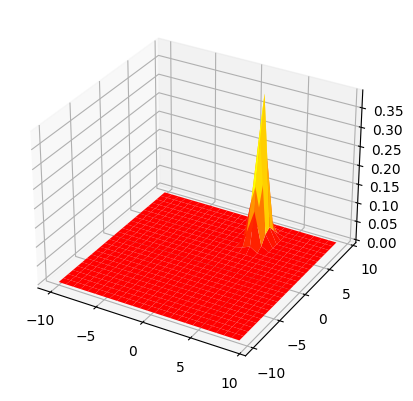

In [8]:
x1 = np.arange(-10,10,20/25).reshape(-1,1)
x2 = np.arange(-10,10,20/25).reshape(-1,1)

P = []

for i in range(len(X)):
     p, x1v, x2v = norm2D(my[i], Sgm[i], x1, x2)
     P.append(p)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x1v, x2v, P[0], cmap='autumn')
np.shape(P)

d)

Plotting discriminant functions for w1 and w2 in the same plot:

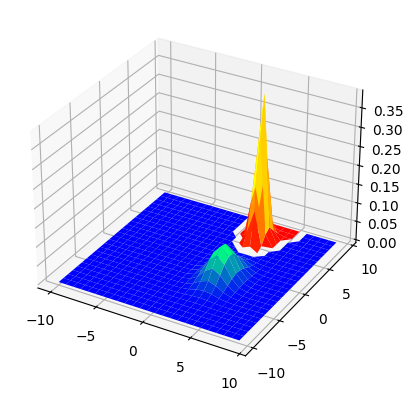

In [4]:
plot_P(P, x1v, x2v)

Comparing to plot from lab2 below we observe that w1 has a higher peak and lower variance when computed from sample points. The low variance of w1 causes the decision boundary to cling much closer to w1.

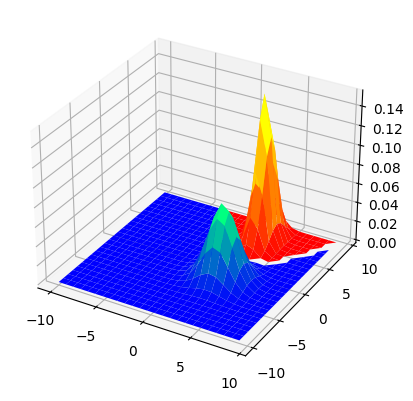

In [5]:
my = []
Sgm = []
P = []

my.append(np.array([3,6]))
Sgm.append(np.array([[0.5,0],[0,2]]))
my.append(np.array([3,-2]))
Sgm.append(np.array([[2,0],[0,2]]))

for i in range(len(my)):
    p, x1v, x2v = norm2D(my[i], Sgm[i], x1, x2)
    P.append(p)

plot_P(P, x1v, x2v)

f) / g)

Computing discriminant functions based on Parzen window principle for w1 and w2.

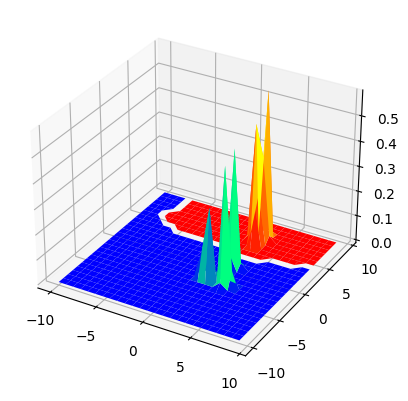

In [6]:
h1 = 0.5
P, x1v, x2v = parzen(X, h1, x1, x2)
plot_P(P, x1v, x2v)

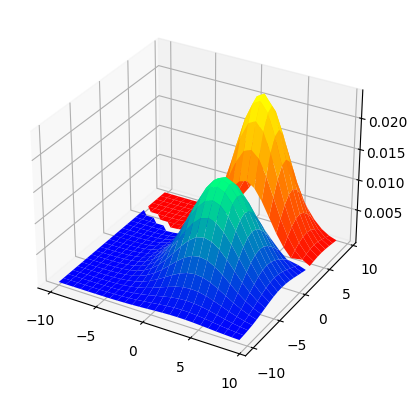

In [7]:
h1 = 5
P, x1v, x2v = parzen(X, h1, x1, x2)
plot_P(P, x1v, x2v)

For Parzen window figures we observe that h1 = 0.5 gives very high peaks around the sample points and almost zero magnitude elswhere. h1 = 5 gives very smooth curves, but we can observe that the decision boundary is much more open compared to result from Lab2.

h) / i) / j)

Computing discriminant functions based on Parzen window principle for w1 and w2.

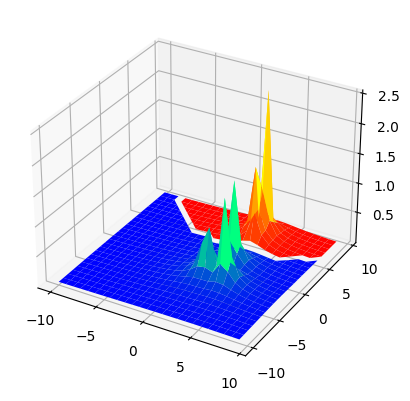

In [8]:
kn = 1
P = []

for i in range(len(X)):
     p, x1v, x2v = knn2D(X[i], kn, x1, x2)
     P.append(p)

plot_P(P, x1v, x2v)

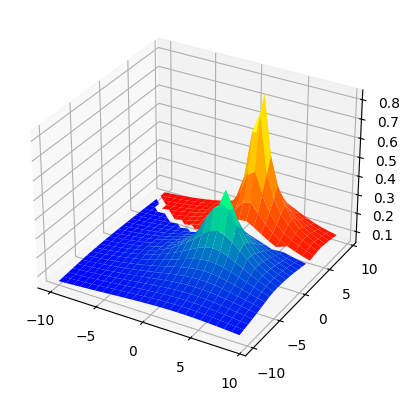

In [9]:
kn = 3
P = []

for i in range(len(X)):
     p, x1v, x2v = knn2D(X[i], kn, x1, x2)
     P.append(p)

plot_P(P, x1v, x2v)

For kn = 1 and kn = 3 we see some similar trend as with h1 = 0.5 vs h1 = 5. A lower number results in pointy graphs and a higher number results in smoother graphs. From this it seems aparent that calibrating kn / h1 for the given task is key for obtaining the most correct decision bounary.

In [13]:
kn = 5
P = []

for i in range(len(X)):
     p, x1v, x2v = knn2D(X[i], kn, x1, x2)
     P.append(p)

plot_P(P, x1v, x2v)

IndexError: index 4 is out of bounds for axis 0 with size 4

Trying to run knn function with kn = 5 does not work as there is no 5th nearest neighbour in either data set. In this case kn = 4 should also not work as one of the sample sets only contain 3 data points.

k)

Created a plotting function for posteriori probabilities for the two functions. As an example we use the function to plot for knn = 3 with equal initial likelihood for each class.

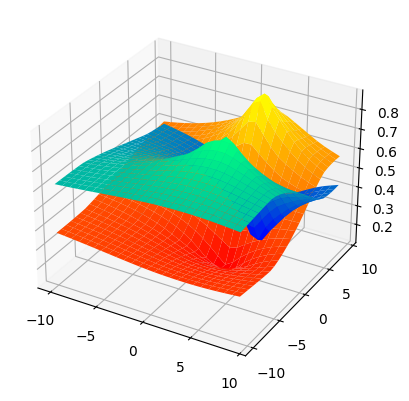

In [11]:
kn = 3
P = []

for i in range(len(X)):
     p, x1v, x2v = knn2D(X[i], kn, x1, x2)
     P.append(p)

pw = np.array([0.5,0.5])
plot_P_post(P, pw, x1v, x2v)